In [3]:
import pandas as pd
import os
import random
import numpy as np
import tensorflow as tf
import cv2


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
class Folder:
    def __init__(self, path):
        self.path = path
    def _read(self, dim):
        self.files = []
        for file in os.listdir(self.path):
            image = cv2.cvtColor(cv2.imread(self.path + "/" + file), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, dim)
            self.files.append(image)
            
        return np.asarray(self.files)

    def _assignLabels(self, label):
        self.labels = np.zeros(len(self.files))
        for i in range(len(self.files)):
            self.labels[i] = label
            
        return self.labels

    def getData(self, label, dim = (100,100), custom_func = None):
        x = self._read(dim)
        if custom_func != None:
            y = custom_func((os.listdir(self.path)))
        else:  
            y = self._assignLabels(label)
        
        return x,y
    
class Data:
    def __init__(self):
        self.x = np.array([])
        self.y = np.array([])
    def add(self, folder, label, dim, custom_func = None):
        x, y = folder.getData(label, dim, custom_func)

        if np.array_equal(self.x, np.array([])):
            self.x = x
            self.y = y
        else: 

            self.x = np.append(self.x, x, axis = 0)
            self.y = np.append(self.y,y, axis = 0)

    def tts(self, test_size):
        if np.array_equal(self.x, np.array([])):
            return None
        
        x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, test_size=test_size, random_state=42)
        
        return x_train, x_test, y_train, y_test

In [8]:
df_train = pd.read_csv("train_img.csv")

In [9]:
df_train.head()

,ImageId,ClassName
0,f27632d7e5.jpg,water
1,efa87919ed.jpg,pizza-margherita-baked
2,4f169e8c8d.jpg,broccoli
3,a6956654bf.jpg,salad-leaf-salad-green
4,d99ce8c3bf.jpg,egg


In [10]:
df_train.drop_duplicates(subset = ["ClassName"])["ImageId"]

0       f27632d7e5.jpg
1       efa87919ed.jpg
2       4f169e8c8d.jpg
3       a6956654bf.jpg
4       d99ce8c3bf.jpg
             ...      
372     11a021fe80.jpg
403     3d14f9187d.jpg
443     244e96cd25.jpg
1053    8a8ff5060a.jpg
1198    698ece9f1d.jpg
Name: ImageId, Length: 61, dtype: object

In [265]:
classes = np.asarray(sorted(df_train["ClassName"].unique()))

In [266]:
classes

array(['almonds', 'apple', 'avocado', 'banana', 'beer', 'biscuits',
       'boisson-au-glucose-50g', 'bread-french-white-flour',
       'bread-sourdough', 'bread-white', 'bread-whole-wheat',
       'bread-wholemeal', 'broccoli', 'butter', 'carrot', 'cheese',
       'chicken', 'chips-french-fries', 'coffee-with-caffeine', 'corn',
       'croissant', 'cucumber', 'dark-chocolate', 'egg',
       'espresso-with-caffeine', 'french-beans', 'gruyere', 'ham-raw',
       'hard-cheese', 'honey', 'jam', 'leaf-spinach', 'mandarine',
       'mayonnaise', 'mixed-nuts', 'mixed-salad-chopped-without-sauce',
       'mixed-vegetables', 'onion', 'parmesan', 'pasta-spaghetti',
       'pickle', 'pizza-margherita-baked', 'potatoes-steamed', 'rice',
       'salad-leaf-salad-green', 'salami', 'salmon', 'sauce-savoury',
       'soft-cheese', 'strawberries', 'sweet-pepper', 'tea', 'tea-green',
       'tomato', 'tomato-sauce', 'water', 'water-mineral',
       'white-coffee-with-caffeine', 'wine-red', 'wine-white'

In [13]:
np.unique(df_train["ClassName"], return_counts = True)[1]

array([ 69, 191,  88, 181,  80,  68,  85,  61,  63, 595,  74, 398,  84,
       346, 297, 137, 106, 136, 377,  37,  75, 107,  88, 209, 195,  75,
        71,  66, 112,  65, 163,  87,  69,  43,  81, 169, 237,  41,  68,
        97,  28, 110, 156, 256, 535,  49,  51,  61,  48,  87,  84, 177,
        69, 358, 110, 863,  86, 122, 241, 151,  90])

In [14]:
def labels(fileNames):
    y = []
    for i in range(len(fileNames)):
        name = fileNames[i]
        print(name)
        str_label = np.asarray((df_train[df_train["ImageId"] == name]["ClassName"]))[0]
        int_label = np.where(classes == str_label)[0]
        final = np.zeros(classes.size)
        final[int_label] = 1.0
        y.append(final)
        
    return np.asarray(y) 

In [15]:
imgs = Folder("train_images/train_images")
data = Data()

In [16]:
data.add(imgs, None, (256,256), labels)

83086e64d8.jpg
7e1892e5ab.jpg
18eb7c37cb.jpg
179a3eee20.jpg
7b516d77e3.jpg
61456b07ae.jpg
a3b6ec40c8.jpg
4480508413.jpg
00f57960d9.jpg
24d2b9aa58.jpg
6e438fc643.jpg
3d497ad0fb.jpg
b396cf175f.jpg
3a3282fc11.jpg
21ebeda23d.jpg
11a364fd5b.jpg
def02d1fbf.jpg
e8e4c7fbb1.jpg
62009a59e0.jpg
12eb7d3575.jpg
82b1709805.jpg
f42251ac6a.jpg
905259bd69.jpg
6e8e023d4c.jpg
47891a4561.jpg
7629aedbb1.jpg
ce1d293873.jpg
858c879fa8.jpg
69cdc1b049.jpg
38d46809bf.jpg
5a1022ad7e.jpg
22857311e1.jpg
25198ba70f.jpg
1395150564.jpg
e8a3ed2ffa.jpg
03e8bd66ad.jpg
b13be142ce.jpg
2b18c21c66.jpg
244982c6df.jpg
30c6a1d72a.jpg
69a9f3c714.jpg
b54455b3ff.jpg
acb16d467c.jpg
7ea148b1dd.jpg
0a5561aba1.jpg
a4ff6226a3.jpg
3029ffade0.jpg
c468439e72.jpg
cdcd744ff9.jpg
1069c4e622.jpg
fa7a018734.jpg
b6d27a1158.jpg
32255bd096.jpg
44ed011dba.jpg
2c7e333e93.jpg
f23194f436.jpg
c2c3d1eead.jpg
85886ab839.jpg
3141528b02.jpg
3273da47a2.jpg
28508123a2.jpg
18cb727664.jpg
494ea30906.jpg
db418ad771.jpg
4e29bab21f.jpg
c033d06f8e.jpg
c772a07dd1

cff89d241d.jpg
11373d5e9b.jpg
56f4f5507c.jpg
7e7bebdd7b.jpg
14dafefed3.jpg
4d415db8fe.jpg
2cd03dfcaa.jpg
47c6fdc1a7.jpg
3a70e0e318.jpg
76aa952681.jpg
a40197d990.jpg
bc6747c4e2.jpg
609682e9d7.jpg
ea638c2de8.jpg
9d1a658e2f.jpg
c2a74ca44d.jpg
5ab6a067ae.jpg
c7b370e671.jpg
2d5b87609b.jpg
d12fa70b1b.jpg
5a5780583d.jpg
e84ee4f502.jpg
519a18308d.jpg
05cb286afa.jpg
010d8328b7.jpg
1fe2ce1ab1.jpg
0f16d8cf42.jpg
51940a7317.jpg
5970f195a0.jpg
2205aad287.jpg
e0ccf5967b.jpg
95484ddb3c.jpg
b05417e0c2.jpg
f62e85c754.jpg
c6fe436d26.jpg
81d3e9b7ff.jpg
aa1f6ba5b6.jpg
6fa65f0572.jpg
7714381d45.jpg
07626a11f9.jpg
ad09b8c7c6.jpg
586ad7accf.jpg
0cd3eb097b.jpg
d5f2070528.jpg
1221b6cac3.jpg
9429a384e2.jpg
d128feba23.jpg
f26df34d6c.jpg
8b95dadb40.jpg
9a1051b991.jpg
dae015909f.jpg
f2341a3f0f.jpg
7443ba82ff.jpg
a808a0a08c.jpg
5620d99f88.jpg
86695ac7ab.jpg
aaf5c4cac2.jpg
f36bb107dc.jpg
80bb0a762c.jpg
cc617b75b4.jpg
4d32b6ec91.jpg
0e063576da.jpg
0f9fb4a1a9.jpg
b157356286.jpg
15400b739f.jpg
38f8671edc.jpg
1543915780

aa61ce7449.jpg
db2c99a19f.jpg
1c18c84cc2.jpg
f5d7a92258.jpg
e3a1e9bc26.jpg
854b710896.jpg
7a5227c806.jpg
7998b03f23.jpg
025f439ad2.jpg
45941c315c.jpg
df17446f9d.jpg
c770e3ab96.jpg
2b031e314c.jpg
2bad58e594.jpg
db38eb3f6a.jpg
5bfff6ba36.jpg
1a2439090f.jpg
2370af2dd7.jpg
555ad65117.jpg
2aac701fb0.jpg
3f9c9d2bd9.jpg
74cad81180.jpg
7e7e2dbd75.jpg
2fb6d3f855.jpg
ff858ccba0.jpg
998be80c7f.jpg
ff00c4852b.jpg
285421b092.jpg
36597726f7.jpg
0888b32849.jpg
ece259718c.jpg
4028719945.jpg
94f3aa78e0.jpg
3bc45f8218.jpg
29ef2e59a9.jpg
2387672781.jpg
29bc1c30d7.jpg
530d7510b4.jpg
66de775ab0.jpg
eb837d4b9a.jpg
53877590ae.jpg
7f868e3583.jpg
9a1d22e0f4.jpg
0d12412adb.jpg
6dd8c30704.jpg
4c2973d5f5.jpg
26a17562a9.jpg
7dea059b47.jpg
ea58de8ef8.jpg
7525798a80.jpg
601f59f2b1.jpg
f88dbd790c.jpg
a79cff96b6.jpg
ab6cea5c9d.jpg
a96d1f113e.jpg
6b7e72c1bf.jpg
17efc48d3b.jpg
67c0fd08b7.jpg
d82a4c56dd.jpg
59bc60b0af.jpg
f5c7343012.jpg
043eea9a0e.jpg
629b158a06.jpg
493587a4cf.jpg
4a1d65b1cb.jpg
32786d828c.jpg
abc9831567

0adfe2d590.jpg
6660ffa02a.jpg
6b75bcbf68.jpg
d7a2685744.jpg
bffa055df3.jpg
fa528dba68.jpg
cea29980ef.jpg
8d0160e69a.jpg
26bd61e295.jpg
6183f7d595.jpg
4a751dbc97.jpg
702dfeca6b.jpg
e441f84747.jpg
593fe66e85.jpg
3270ec18cf.jpg
f47589ce75.jpg
3403055fdf.jpg
a9af0cae51.jpg
22b63057b8.jpg
37e2ac0aec.jpg
34286bb61f.jpg
3a58375ced.jpg
e958f0a325.jpg
646cc4a613.jpg
72434a3985.jpg
ba650a70b0.jpg
5a3a6acf53.jpg
c27d68174c.jpg
7d223258d2.jpg
66df4f4f1b.jpg
0459df1578.jpg
c895658dde.jpg
f89b6272c1.jpg
f3c2c5fdf0.jpg
743e541870.jpg
c4fca977f7.jpg
7369210e5d.jpg
6ddaf9e6d5.jpg
095a539a49.jpg
d935e45b3c.jpg
676d81c8e0.jpg
0c3786acd1.jpg
90a1378d8d.jpg
70cdcd377f.jpg
8919c2f4f0.jpg
f0273c9aab.jpg
1caadab892.jpg
6143d401b2.jpg
4f2341d434.jpg
b4a81be186.jpg
975c7510e8.jpg
2f54701653.jpg
509372db5e.jpg
956b1f79cf.jpg
3e6781ad5e.jpg
3a67eafd75.jpg
aae23557fd.jpg
f5daa15ba3.jpg
a630262826.jpg
7cc9cef298.jpg
aab09e4617.jpg
8735c62bd7.jpg
4bc53ce1da.jpg
a6ef582d02.jpg
b1b8761182.jpg
fcb0331b16.jpg
c3725fcc21

d93f961366.jpg
2dfaaeb699.jpg
43a3c40fb5.jpg
a8d1d2cb0f.jpg
bd2fda8c46.jpg
b8855730b5.jpg
5d5ac4f681.jpg
ecb1a17d42.jpg
0b62eb0ad9.jpg
ee770d75d0.jpg
edd4773708.jpg
47eb3619be.jpg
9680bf9a8d.jpg
ecce74a924.jpg
0d06bf7097.jpg
fb1c475e3f.jpg
51c132f831.jpg
ebde395344.jpg
12609c82f0.jpg
4bbb6081f7.jpg
d9036c2346.jpg
64768f06c8.jpg
3f165a48b8.jpg
37ee23bd92.jpg
1f4687f33d.jpg
be2ceaea89.jpg
5443755d7a.jpg
2c7015fde1.jpg
effd315260.jpg
0c524fe46c.jpg
6e11632746.jpg
a491c86df4.jpg
e5482eb941.jpg
372abf538f.jpg
cdc1f4e6d5.jpg
d895484fdb.jpg
9f9f7d84e7.jpg
b58283d2fa.jpg
33a1471618.jpg
9af2b1a088.jpg
d4218ca97a.jpg
1b671c8d32.jpg
245ed88363.jpg
f1898049a8.jpg
2c47b2ca1b.jpg
1c38ba8b36.jpg
b585767961.jpg
2a24979700.jpg
17d7319c31.jpg
36e5b4622a.jpg
15a87d4817.jpg
d981710b5c.jpg
d39ceb430c.jpg
6c3c52199a.jpg
77cf13676e.jpg
e9812f1578.jpg
7c2053a808.jpg
68d3657cf0.jpg
f8c2582773.jpg
cd8811ff0c.jpg
7099e9571b.jpg
efe3907668.jpg
ed231e4772.jpg
cb11a0f95f.jpg
9f52dc5350.jpg
601c61ee33.jpg
8d6269b0f1

ffec8e7dc0.jpg
4f9da2c4f0.jpg
b89d3fe018.jpg
47b8150178.jpg
ed6f280bae.jpg
71264a31b1.jpg
13d5e29bb7.jpg
6987716b78.jpg
09152e76c1.jpg
f99e42b1de.jpg
105547a0ac.jpg
fb5fbd2f01.jpg
a4d785d251.jpg
a878684d4b.jpg
d23c550510.jpg
0ba7389cb1.jpg
f63fd3c3a6.jpg
cdfafd5f2f.jpg
27ab931ca4.jpg
e654f3accd.jpg
a8cea79069.jpg
b9487dc7e3.jpg
e3efa7354c.jpg
a470d68bcb.jpg
e588f48dc3.jpg
1cf818139e.jpg
f54b5fa243.jpg
12294127ed.jpg
3730e884e0.jpg
8dc06834f7.jpg
602d5b7727.jpg
48ef3501cb.jpg
4e068c63ec.jpg
4294cf3a3a.jpg
a0340a9736.jpg
05a322be3c.jpg
598e43a615.jpg
03708f4a2c.jpg
16de49e590.jpg
f94619d2ed.jpg
d9890c9224.jpg
02937be57a.jpg
bbd3308781.jpg
ad966946ba.jpg
a7660f5fdf.jpg
a1ab7bc8a2.jpg
550b3bcfc5.jpg
8741b80877.jpg
37cd4defd2.jpg
befebee33d.jpg
7ee50d77c5.jpg
650232e4d5.jpg
444b4c15f6.jpg
e4ed89582d.jpg
5efebc592f.jpg
7644e94fe5.jpg
d5baba5623.jpg
2888352f00.jpg
a4df7cdd88.jpg
ac8f7219b3.jpg
8c414c498d.jpg
d9eafbc276.jpg
69999d426b.jpg
c9a6888bf8.jpg
ea505c8ed2.jpg
3e261aeb28.jpg
f7b7232157

7cca40b9c2.jpg
a7922c53eb.jpg
15fe45855e.jpg
060abce118.jpg
232f40e053.jpg
2ddd56ddea.jpg
4c746cce5e.jpg
8805308e34.jpg
9aeb73b7de.jpg
912b42734a.jpg
b736140d30.jpg
76b5fd841e.jpg
f9043c4271.jpg
6eeddc7f69.jpg
0e25327f93.jpg
3cd82f5d25.jpg
4eeadbabd1.jpg
8e06868a46.jpg
5020591378.jpg
be41e31982.jpg
63e5abde89.jpg
ecfa90f7ed.jpg
afb16cc6da.jpg
507aab4936.jpg
2489197401.jpg
4eae111559.jpg
0677601d11.jpg
97633085e6.jpg
909ee30f75.jpg
b558676817.jpg
1f9a2b7699.jpg
e06b0d5251.jpg
a66b92433e.jpg
d7fe70b5ef.jpg
416bacee3d.jpg
aabe1e72ab.jpg
e3e0772391.jpg
d77dcbcc9d.jpg
93be927a0c.jpg
a36f292b9d.jpg
5229a7f22a.jpg
0371a92f04.jpg
66cbd09076.jpg
370bc2ae8e.jpg
382abbb212.jpg
0bb195c934.jpg
bba196203b.jpg
e44e38ef30.jpg
7274478365.jpg
5cec90eedc.jpg
0d2de1f4dd.jpg
ae3a3642a1.jpg
09d321df18.jpg
6d5faceb4b.jpg
e3eb1ac510.jpg
b89eeef243.jpg
29a113ee4c.jpg
e1390a476d.jpg
652179afa3.jpg
ef9e6e58e6.jpg
e303fdd8e2.jpg
24bd5e9cf5.jpg
1f13bf8e21.jpg
308206110e.jpg
f146c016cd.jpg
8c077f2791.jpg
da67492b60

1404e2ef28.jpg
ea1e47c1f1.jpg
014d8739ea.jpg
7e56701fd6.jpg
5e5942a787.jpg
1a3e805c32.jpg
dc4bd9b17c.jpg
594cdfdbcd.jpg
51678a508a.jpg
bab91f1ea0.jpg
bdf8463caa.jpg
47840895d9.jpg
37d2bd512b.jpg
e937344ef8.jpg
aae5026271.jpg
a2d57e971e.jpg
05f3390ea9.jpg
25568a4b53.jpg
0a128ea385.jpg
c617819853.jpg
09946a6611.jpg
8d164e4b25.jpg
caabb42135.jpg
657cd94939.jpg
328414fe2f.jpg
ec934fd9cf.jpg
e68a03cd55.jpg
2fe7ce58d9.jpg
12665ea8a7.jpg
5efef89e73.jpg
65cd48c45b.jpg
5c4bc74da1.jpg
83b8f50c1f.jpg
44a6639b7e.jpg
e4bfbad1cb.jpg
8f2aa042bd.jpg
4f8123a401.jpg
778d7ac7b3.jpg
ee5f7b9519.jpg
40b738e5fb.jpg
a122b51dbb.jpg
7e30ed7e57.jpg
8c1b961268.jpg
643277430b.jpg
8704e89824.jpg
026ef5ab3a.jpg
83746e30f1.jpg
a46ac218aa.jpg
d77e512310.jpg
bc59eb23dd.jpg
dd9ddbb86a.jpg
50949f2630.jpg
d5753df560.jpg
c376fd06eb.jpg
66c1cd40d5.jpg
605d32da8b.jpg
6b1f4a1a0a.jpg
c3563e0c89.jpg
ebe77722c6.jpg
998552a8b5.jpg
f57b6ee520.jpg
641c49d165.jpg
7626406df6.jpg
21df9005b2.jpg
bd30d7c07f.jpg
f07229e74e.jpg
a28a0ed3a5

In [17]:
x_train, x_val, y_train, y_val = data.tts(0.2)

In [125]:
def create_model():
    base_model = tf.keras.applications.EfficientNetB1(
    weights= "imagenet", include_top=False, input_shape= (256,256,3)
    )
    num_classes=61

    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
   
    x = tf.keras.layers.Dropout(0.2)(x)
    predictions = tf.keras.layers.Dense(num_classes, activation= 'softmax')(x)
    model = tf.keras.Model(inputs = base_model.input, outputs = predictions)
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['acc'])
    return model

In [126]:
epochs = 10
model = create_model()
model.fit(x_train, y_train, epochs = epochs, validation_data = (x_val, y_val))


Epoch 1/10


2023-08-07 10:09:38.474243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - ETA: 0s - loss: 2.5292 - acc: 0.3947

2023-08-07 10:16:40.391221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - 460s 2s/step - loss: 2.5292 - acc: 0.3947 - val_loss: 2.3594 - val_acc: 0.4391
Epoch 2/10
144/234 [=================>............] - ETA: 2:39 - loss: 1.7257 - acc: 0.5380

KeyboardInterrupt: 

In [16]:
model.save("")

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


In [407]:
def predict_on_custom_image(path, model):
    label_names = classes
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    image = cv2.resize(image, (256,256))
    predictions = model.predict(image.reshape(1, 256, 256, 3, 1))[0]
    chosen = predictions.argmax()
    pred2 = np.delete(predictions, np.where(predictions == predictions[chosen])).argmax()
    if predictions[pred2] > 0.2:
        #print(f"{predictions[pred2]}% confidence")
        print(f"Prediction: , {label_names[chosen]} {predictions[chosen]}% and {label_names[pred2]} {predictions[pred2]}%")
    #print(label_names[pred2])
    #print(f"{predictions[pred2]}% confidence")
    else:
        print("Prediction: ", label_names[chosen])
        print(f"{predictions[chosen]}% confidence")

In [276]:
def predict_on_image_return(path, model):
    label_names = classes
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    image = cv2.resize(image, (256,256))
    predictions = model.predict(image.reshape(1, 256, 256, 3, 1))[0]
    chosen = predictions.argmax()
    return label_names[chosen]

e68641475c.jpg
1/1 [==============================] - 0s 36ms/step
Prediction:  strawberries
0.8806273937225342% confidence


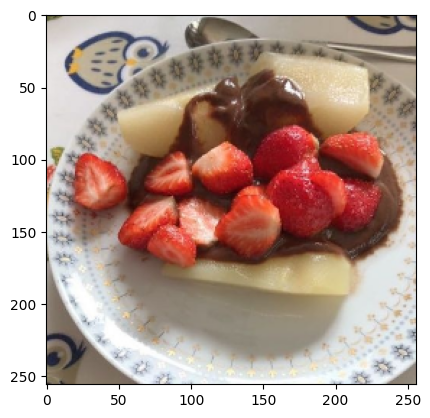

In [406]:
test_images = os.listdir("test_images/test_images")
rand_image = test_images[random.randint(0,len(test_images) - 1)]
print(rand_image)
#predict_on_custom_image("test_images/test_images/" + rand_image, frozen_model)
predict_on_custom_image("test_images/test_images/" + rand_image, model)


In [ ]:
test_images = os.listdir("test_images/test_images")
rand_image = test_images[random.randint(0,len(test_images) - 1)]
print(rand_image)
predict_on_custom_image("test_images/test_images/" + rand_image, model)


In [27]:
classes

array(['almonds', 'apple', 'avocado', 'banana', 'beer', 'biscuits',
       'boisson-au-glucose-50g', 'bread-french-white-flour',
       'bread-sourdough', 'bread-white', 'bread-whole-wheat',
       'bread-wholemeal', 'broccoli', 'butter', 'carrot', 'cheese',
       'chicken', 'chips-french-fries', 'coffee-with-caffeine', 'corn',
       'croissant', 'cucumber', 'dark-chocolate', 'egg',
       'espresso-with-caffeine', 'french-beans', 'gruyere', 'ham-raw',
       'hard-cheese', 'honey', 'jam', 'leaf-spinach', 'mandarine',
       'mayonnaise', 'mixed-nuts', 'mixed-salad-chopped-without-sauce',
       'mixed-vegetables', 'onion', 'parmesan', 'pasta-spaghetti',
       'pickle', 'pizza-margherita-baked', 'potatoes-steamed', 'rice',
       'salad-leaf-salad-green', 'salami', 'salmon', 'sauce-savoury',
       'soft-cheese', 'strawberries', 'sweet-pepper', 'tea', 'tea-green',
       'tomato', 'tomato-sauce', 'water', 'water-mineral',
       'white-coffee-with-caffeine', 'wine-red', 'wine-white'

In [18]:
base_model = tf.keras.applications.EfficientNetB1(
    weights= "imagenet", include_top=False, input_shape= (256,256,3)
    )

2023-08-07 08:28:41.121374: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-07 08:28:41.121429: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-07 08:28:41.121434: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-07 08:28:41.121606: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-07 08:28:41.121658: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
def create_model():
    base_model = tf.keras.applications.EfficientNetB1(
    weights= "imagenet", include_top=False, input_shape= (256,256,3)
    )
    num_classes=61
    
    base_model.trainable = False
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    predictions = tf.keras.layers.Dense(num_classes, activation= 'softmax')(x)
    model = tf.keras.Model(inputs = base_model.input, outputs = predictions)
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['acc'])
    return model

In [22]:
frozen_model = create_model()
epochs = 10

In [23]:
frozen_model.fit(x_train, y_train, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/10


2023-08-07 09:12:19.798566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - ETA: 0s - loss: 2.3185 - acc: 0.4166

2023-08-07 09:13:47.769907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - 114s 465ms/step - loss: 2.3185 - acc: 0.4166 - val_loss: 1.7140 - val_acc: 0.5314
Epoch 2/10
234/234 [==============================] - 104s 445ms/step - loss: 1.5304 - acc: 0.5629 - val_loss: 1.5472 - val_acc: 0.5555
Epoch 3/10
234/234 [==============================] - 104s 443ms/step - loss: 1.3322 - acc: 0.6070 - val_loss: 1.5085 - val_acc: 0.5592
Epoch 4/10
234/234 [==============================] - 104s 446ms/step - loss: 1.1940 - acc: 0.6448 - val_loss: 1.4842 - val_acc: 0.5651
Epoch 5/10
234/234 [==============================] - 104s 445ms/step - loss: 1.1075 - acc: 0.6704 - val_loss: 1.4765 - val_acc: 0.5657
Epoch 6/10
234/234 [==============================] - 105s 449ms/step - loss: 1.0348 - acc: 0.6931 - val_loss: 1.4784 - val_acc: 0.5576
Epoch 7/10
234/234 [==============================] - 106s 452ms/step - loss: 0.9777 - acc: 0.7041 - val_loss: 1.4713 - val_acc: 0.5635
Epoch 8/10
234/234 [==============================] - 107s 

In [370]:
model = tf.keras.models.load_model("assets")

In [267]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling_10 (Rescaling)    (None, 256, 256, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_5 (Normaliza  (None, 256, 256, 3)          7         ['rescaling_10[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_11 (Rescaling)    (None, 256, 256, 3)          0         ['normalization_5[0][0]'

                                                                                                  
 block2a_expand_conv (Conv2  (None, 128, 128, 96)         1536      ['block1b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2a_expand_bn (BatchNo  (None, 128, 128, 96)         384       ['block2a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2a_expand_activation   (None, 128, 128, 96)         0         ['block2a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2a_d

 block2c_expand_conv (Conv2  (None, 64, 64, 144)          3456      ['block2b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2c_expand_bn (BatchNo  (None, 64, 64, 144)          576       ['block2c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2c_expand_activation   (None, 64, 64, 144)          0         ['block2c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2c_dwconv (DepthwiseC  (None, 64, 64, 144)          1296      ['block2c_expand_activation[0]
 onv2D)   

 D)                                                                                               
                                                                                                  
 block3b_expand_bn (BatchNo  (None, 32, 32, 240)          960       ['block3b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block3b_expand_activation   (None, 32, 32, 240)          0         ['block3b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block3b_dwconv (DepthwiseC  (None, 32, 32, 240)          6000      ['block3b_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block4a_expand_conv (Conv2  (None, 32, 32, 240)          9600      ['block3c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4a_expand_bn (BatchNo  (None, 32, 32, 240)          960       ['block4a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4a_expand_activation   (None, 32, 32, 240)          0         ['block4a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4a_dwconv_pad (ZeroPa  (None, 33, 33, 240)          0         ['block4a_expand_activation[0]
 dding2D) 

 D)                                                                                               
                                                                                                  
 block4c_expand_bn (BatchNo  (None, 16, 16, 480)          1920      ['block4c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4c_expand_activation   (None, 16, 16, 480)          0         ['block4c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4c_dwconv (DepthwiseC  (None, 16, 16, 480)          4320      ['block4c_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block5a_expand_conv (Conv2  (None, 16, 16, 480)          38400     ['block4d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_expand_bn (BatchNo  (None, 16, 16, 480)          1920      ['block5a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5a_expand_activation   (None, 16, 16, 480)          0         ['block5a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5a_dwconv (DepthwiseC  (None, 16, 16, 480)          12000     ['block5a_expand_activation[0]
 onv2D)   

 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 16, 16, 672)          0         ['block5c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5c_dwconv (DepthwiseC  (None, 16, 16, 672)          16800     ['block5c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5c_bn (BatchNormaliza  (None, 16, 16, 672)          2688      ['block5c_dwconv[0][0]']      
 tion)                                                                                            
          

 block6a_expand_bn (BatchNo  (None, 16, 16, 672)          2688      ['block6a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6a_expand_activation   (None, 16, 16, 672)          0         ['block6a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6a_dwconv_pad (ZeroPa  (None, 19, 19, 672)          0         ['block6a_expand_activation[0]
 dding2D)                                                           [0]']                         
                                                                                                  
 block6a_dwconv (DepthwiseC  (None, 8, 8, 672)            16800     ['block6a_dwconv_pad[0][0]']  
 onv2D)   

 rmalization)                                                                                     
                                                                                                  
 block6c_expand_activation   (None, 8, 8, 1152)           0         ['block6c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6c_dwconv (DepthwiseC  (None, 8, 8, 1152)           28800     ['block6c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6c_bn (BatchNormaliza  (None, 8, 8, 1152)           4608      ['block6c_dwconv[0][0]']      
 tion)                                                                                            
          

 block6e_expand_bn (BatchNo  (None, 8, 8, 1152)           4608      ['block6e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6e_expand_activation   (None, 8, 8, 1152)           0         ['block6e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6e_dwconv (DepthwiseC  (None, 8, 8, 1152)           28800     ['block6e_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6e_bn (BatchNormaliza  (None, 8, 8, 1152)           4608      ['block6e_dwconv[0][0]']      
 tion)    

 (Activation)                                                                                     
                                                                                                  
 block7b_dwconv (DepthwiseC  (None, 8, 8, 1920)           17280     ['block7b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block7b_bn (BatchNormaliza  (None, 8, 8, 1920)           7680      ['block7b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block7b_activation (Activa  (None, 8, 8, 1920)           0         ['block7b_bn[0][0]']          
 tion)                                                                                            
          

1/1 [==============================] - 3s 3s/step
['apple']
{'Category': 'Bibimbap', 'Description': 'Bibimbap, Korean', 'Nutrient Data Bank Number': 58150100, 'Data': {'Alpha Carotene': 243, 'Beta Carotene': 1564, 'Beta Cryptoxanthin': 6, 'Carbohydrate': 8.61, 'Cholesterol': 12, 'Choline': 20.3, 'Fiber': 1.1, 'Lutein and Zeaxanthin': 2268, 'Lycopene': 0, 'Niacin': 1.44, 'Protein': 5.47, 'Retinol': 0, 'Riboflavin': 0.108, 'Selenium': 6.7, 'Sugar Total': 1.59, 'Thiamin': 0.075, 'Water': 81.29, 'Fat': {'Monosaturated Fat': 1.157, 'Polysaturated Fat': 0.791, 'Saturated Fat': 0.693, 'Total Lipid': 2.88}, 'Major Minerals': {'Calcium': 31, 'Copper': 0.119, 'Iron': 1.31, 'Magnesium': 27, 'Phosphorus': 63, 'Potassium': 250, 'Sodium': 424, 'Zinc': 1.27}, 'Vitamins': {'Vitamin A - RAE': 141, 'Vitamin B12': 0.37, 'Vitamin B6': 0.175, 'Vitamin C': 10.1, 'Vitamin E': 0.51, 'Vitamin K': 94.1}}}
None


NameError: name 'pred' is not defined

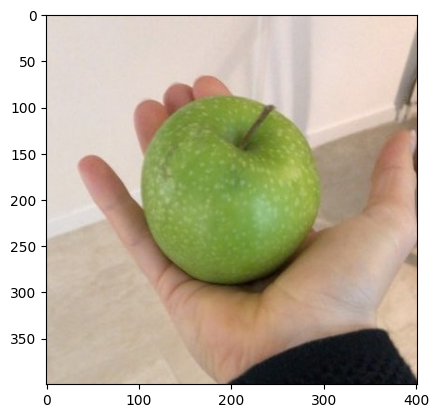

In [398]:
import food
test_images = os.listdir("test_images/test_images")
rand_image = test_images[random.randint(0,len(test_images) - 1)]
prediction = (predict_on_image_return("train_images/train_images/" + "0a5a91df5d.jpg", model)).split("-")
prediction = [value for value in prediction if value != "with" and value != "without"]
print(prediction)
finalPred = None
maxMatches = 0
secondaryPred = None
secondMaxMatches = 0
prediction = ["bibimbap"]
for fd in food.get_report():
   # if prediction.lower() in fd["Description"].lower()
    matches = 0
    for item in prediction:
        if item.lower() == fd["Category"].lower():
            matches += 1
        if item.lower() in fd["Description"].lower():
            matches += 1
                
    if matches > maxMatches:
        maxMatches = int(matches)
        finalPred = fd
    elif matches > secondMaxMatches:
        secondMaxMatches = matches
        secondaryPred = fd
        
print(finalPred)
print(secondaryPred)
print(pred)


In [387]:
[2] + [3]

[2, 3]

In [397]:
round(4.23, 1)

4.2

In [399]:
classes

array(['almonds', 'apple', 'avocado', 'banana', 'beer', 'biscuits',
       'boisson-au-glucose-50g', 'bread-french-white-flour',
       'bread-sourdough', 'bread-white', 'bread-whole-wheat',
       'bread-wholemeal', 'broccoli', 'butter', 'carrot', 'cheese',
       'chicken', 'chips-french-fries', 'coffee-with-caffeine', 'corn',
       'croissant', 'cucumber', 'dark-chocolate', 'egg',
       'espresso-with-caffeine', 'french-beans', 'gruyere', 'ham-raw',
       'hard-cheese', 'honey', 'jam', 'leaf-spinach', 'mandarine',
       'mayonnaise', 'mixed-nuts', 'mixed-salad-chopped-without-sauce',
       'mixed-vegetables', 'onion', 'parmesan', 'pasta-spaghetti',
       'pickle', 'pizza-margherita-baked', 'potatoes-steamed', 'rice',
       'salad-leaf-salad-green', 'salami', 'salmon', 'sauce-savoury',
       'soft-cheese', 'strawberries', 'sweet-pepper', 'tea', 'tea-green',
       'tomato', 'tomato-sauce', 'water', 'water-mineral',
       'white-coffee-with-caffeine', 'wine-red', 'wine-white'